In [11]:
from AnalyzeMot import AnalyzeMOT
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import sys
sys.path.append('../')
import mp1_config

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

### 85Rb F = 2 -> 3

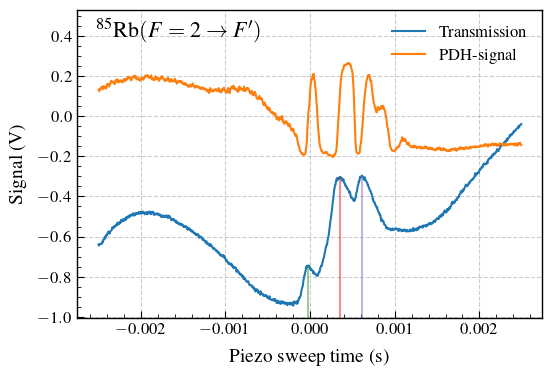

In [26]:
data = np.loadtxt('./Data/DFS/85 F20.csv', skiprows=1, delimiter=',')

time = data[:,0]
ch1 = data[:,1]     # Piezo signal
ch2 = data[:,2]     # Transmission signal
ch3 = data[:,3]     # Error signal
ch4 = data[:,4]     # Step function

fig, ax = plt.subplots(figsize=(6,4))

""" --- 85 RB F2 --- """

ch2 = ch2 - 0.1

#ax.plot(time, ch1)
ax.plot(time, ch2, color=f'C{0}', label='Transmission')
ax.plot(time, ch3, color=f'C{1}', label='PDH-signal')
#ax.plot(time, ch4)

ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, max(ch3)*2.0)
ax.grid(alpha=0.4)
ax.set_xlabel("Piezo sweep time (s)")
ax.set_ylabel("Signal (V)")
ax.legend()

x0 = 0.04
text = r'$^{85}\mathrm{Rb}(F=2 \rightarrow F^\prime)$'
ax.text(x0, 0.91, text, transform=ax.transAxes, fontsize=16)

peaks = find_peaks(ch2, distance=50, prominence=0.05)[0]
peaks = np.delete(peaks, 0)

for i, index in enumerate(peaks) : 
    t = time[index]
    s = ch2[index]
    lower_lim = ax.get_ylim()[0]
    ax.vlines(x=t, ymin=lower_lim, ymax=s, color=f'C{i+2}', linestyle='-', alpha=0.5)
    #ax.plot(t, s, marker='s', markeredgecolor=f'C{i+2}', markerfacecolor='w', markeredgewidth=1.0, markersize=4)

fig.savefig("./Figures/85rbf=2.png", format='png', bbox_inches='tight', dpi=400)


## 85 F = 3 -> 0

[304 462 564]


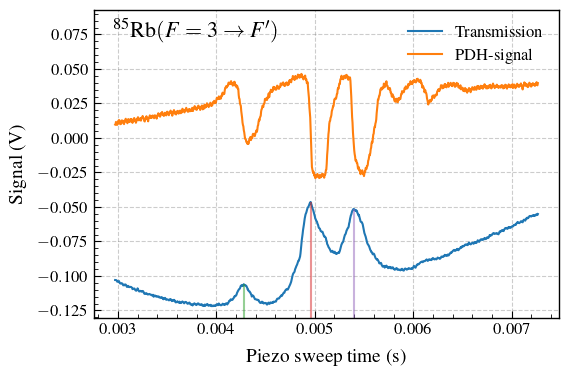

In [27]:
data = np.loadtxt('./Data/DFS/85 F30.csv', skiprows=1, delimiter=',')

time = data[:,0]
ch2 = data[:,2]
ch3 = data[:,3]

# compute rescaled ch2
ch2_min, ch2_max = ch2.min(), ch2.max()
ch3_min, ch3_max = ch3.min(), ch3.max()

ch2_norm = ((ch2 - ch2_min) / (ch2_max - ch2_min)) \
           * (ch3_max - ch3_min) + ch3_min

ch2_norm -= 2.0*max(ch3)
ch2 = ch2_norm

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(time, ch2, color=f'C{0}', label='Transmission')
ax.plot(time, ch3, color=f'C{1}', label='PDH-signal')

ymin, ymax = ax.get_ylim()
ax.grid(alpha=0.4)
ax.set_ylim(ymin, max(ch3)*2.0)
ax.set_xlabel("Piezo sweep time (s)")
ax.set_ylabel("Signal (V)")
ax.legend()

text = r'$^{85}\mathrm{Rb}(F=3 \rightarrow F^\prime)$'
ax.text(x0, 0.91, text, transform=ax.transAxes, fontsize=16)

peaks = find_peaks(ch2, distance=100, prominence=0.01)[0]
print(peaks)

lower_lim = ax.get_ylim()[0]

strings = ["", "", ""]

for i, index in enumerate(peaks) : 
    t = time[index]
    s = ch2[index]
    ax.vlines(x=t, ymin=lower_lim, ymax=s, color=f'C{i+2}', linestyle='-', alpha=0.5)

fig.savefig("./Figures/85rbf=3.png", format='png', bbox_inches='tight', dpi=400)

### 87 cooling

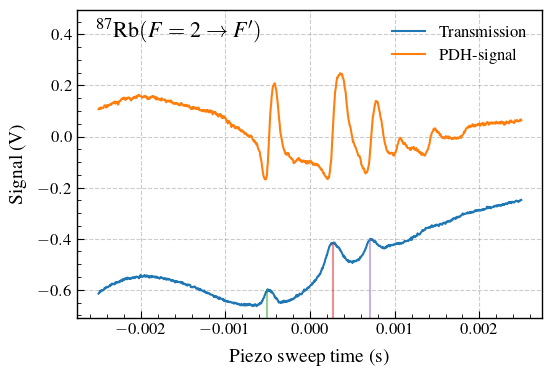

In [28]:
data = np.loadtxt('./Data/DFS/87 cooling0.csv', skiprows=1, delimiter=',')

time = data[:,0]
ch2 = data[:,2]
ch3 = data[:,3]

# compute rescaled ch2
ch2_min, ch2_max = ch2.min(), ch2.max()
ch3_min, ch3_max = ch3.min(), ch3.max()

ch2_norm = ((ch2 - ch2_min) / (ch2_max - ch2_min)) \
           * (ch3_max - ch3_min) + ch3_min

ch2_norm -= 2.0*max(ch3)
ch2 = ch2_norm

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(time, ch2, color=f'C{0}', label='Transmission')
ax.plot(time, ch3, color=f'C{1}', label='PDH-signal')

ymin, ymax = ax.get_ylim()
ax.grid(alpha=0.4)
ax.set_ylim(ymin, max(ch3)*2.0)
ax.set_xlabel("Piezo sweep time (s)")
ax.set_ylabel("Signal (V)")
ax.legend()
text = r'$^{87}\mathrm{Rb}(F=2 \rightarrow F^\prime)$'
ax.text(x0, 0.91, text, transform=ax.transAxes, fontsize=16)

peaks = find_peaks(ch2, distance=50, prominence=0.01)[0]
peaks = np.delete(peaks, 0)

lower_lim = ax.get_ylim()[0]

strings = ["", "", ""]

for i, index in enumerate(peaks) : 
    t = time[index]
    s = ch2[index]
    ax.vlines(x=t, ymin=lower_lim, ymax=s, color=f'C{i+2}', linestyle='-', alpha=0.5)

fig.savefig("./Figures/87rbcooling.png", format='png', bbox_inches='tight', dpi=400)

### 87 repump

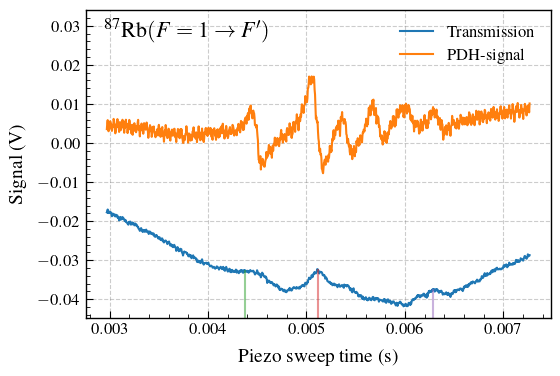

In [29]:
data = np.loadtxt('./Data/DFS/87repump0.csv', skiprows=1, delimiter=',')

time = data[:,0]
ch2 = data[:,2]
ch3 = data[:,3]

# compute rescaled ch2
ch2_min, ch2_max = ch2.min(), ch2.max()
ch3_min, ch3_max = ch3.min(), ch3.max()

ch2_norm = ((ch2 - ch2_min) / (ch2_max - ch2_min)) \
           * (ch3_max - ch3_min) + ch3_min

ch2_norm -= 2.0*max(ch3)
ch2 = ch2_norm

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(time, ch2, color=f'C{0}', label='Transmission')
ax.plot(time, ch3, color=f'C{1}', label='PDH-signal')

ymin, ymax = ax.get_ylim()
ax.grid(alpha=0.4)
ax.set_ylim(ymin, max(ch3)*2.0)
ax.set_xlabel("Piezo sweep time (s)")
ax.set_ylabel("Signal (V)")
ax.legend()
text = r'$^{87}\mathrm{Rb}(F=1 \rightarrow F^\prime)$'
ax.text(x0, 0.91, text, transform=ax.transAxes, fontsize=16)

peaks = find_peaks(ch2, distance=50, prominence=0.00081)[0]

lower_lim = ax.get_ylim()[0]

strings = ["", "", ""]

for i, index in enumerate(peaks) : 
    t = time[index]
    s = ch2[index]
    ax.vlines(x=t, ymin=lower_lim, ymax=s, color=f'C{i+2}', linestyle='-', alpha=0.5)

fig.savefig("./Figures/87rbrepump.png", format='png', bbox_inches='tight', dpi=400)

In [21]:
import numpy as np

es = lambda x : -x*np.log2(x)

print(es(2/8) + es(6/8))

print(0.940 - 8/14 * 0.811 - 6/14 * 1.0)

print(0.940 - 4/14 * 1.0 - 6/14 * 0.918 - 4/14 * 0.811)

0.8112781244591328
0.04799999999999999
0.029142857142857137
